In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# importing the heart disease dataset
heart = pd.read_csv('heart.csv')

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


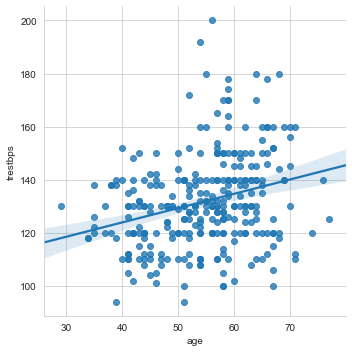

In [5]:
sns.lmplot(data=heart,x='age',y='trestbps')
# Data shows resting blood pressure higher in older patients

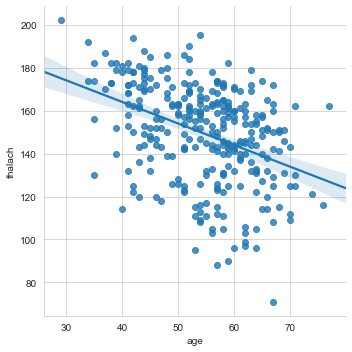

In [6]:
sns.lmplot(data=heart,x='age',y='thalach')
# Data shows maximum heart rate acheived lower in older patients

In [7]:
# importing the classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [8]:
# set a few different parameters to check which fits bets into the model
paramgrid = {'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [9]:
model = GridSearchCV(estimator=SVC(),param_grid=paramgrid, verbose=3)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# split the data in training and test data
X_train,X_test,y_train,y_test = train_test_split(heart.drop('target',axis=1),heart['target'],test_size=0.33)

In [12]:
model.fit(X_train,y_train)

/Users/Aziz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.507, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.507, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.507, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.522, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.537, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.507, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ...........

[CV] ............... C=10000, gamma=0.0001, score=0.627, total=   0.0s
[CV] C=10000, gamma=0.0001 ...........................................
[CV] ............... C=10000, gamma=0.0001, score=0.731, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished
/Users/Aziz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
# CVgridsearch chooses the best parameters to go ahead with
model.best_params_

{'C': 1000, 'gamma': 0.0001}

In [14]:
model.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
model.best_score_

0.7389162561576355

In [16]:
predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(confusion_matrix(y_test,predictions))
print('')
print(classification_report(y_test,predictions))

[[29  6]
 [20 45]]

              precision    recall  f1-score   support

           0       0.59      0.83      0.69        35
           1       0.88      0.69      0.78        65

    accuracy                           0.74       100
   macro avg       0.74      0.76      0.73       100
weighted avg       0.78      0.74      0.75       100

